## requests

In [1]:
import requests

In [2]:
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")

In [3]:
# 状态码200表示请求成功
req

<Response [200]>

In [4]:
type(req)

requests.models.Response

In [5]:
# 显示req对象的所有属性
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [6]:
page = req.text
page

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Harvard University - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":793344732,"wgRevisionId":793344732,"wgArticleId":18426501,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from September 2014","All articles containing potentially dated statements","All articles with dead external links","Articles with dead external links from July 2017","Articles with permanently dead external links","CS1 maint: Extra text: editors list",

## BeautifulSoup

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Harvard University - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":793344732,"wgRevisionId":793344732,"wgArticleId":18426501,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from September 2014","All articles containing potentially dated statements","All articles with dead external links","Articles with dead external links from July 2017","Articles with permanently dead external links","CS1 maint: Extra text: editors list","Webarch

In [9]:
# 显示页面的title，不过title并不是soup对象的一个属性，只是语法糖
soup.title

<title>Harvard University - Wikipedia</title>

In [10]:
'title' in dir(soup)

False

In [11]:
# 在html里<title>是唯一的，但是<p>不是唯一的
soup.p

<p><b>Harvard University</b> is a private <a href="/wiki/Ivy_League" title="Ivy League">Ivy League</a> <a href="/wiki/Research_university" title="Research university">research university</a> in <a href="/wiki/Cambridge,_Massachusetts" title="Cambridge, Massachusetts">Cambridge, Massachusetts</a>, established in 1636, whose history, influence, and wealth have made it one of the world's most prestigious universities.<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup></p>

In [12]:
# 该页面总共有多少个p元素
len(soup.find_all('p'))

74

In [13]:
# 查看<table>元素的class属性
soup.table['class'] # 返回的是页面中第一个<table>元素

['infobox', 'vcard']

## List Comprehensions

In [14]:
# 显示所有<table>元素的class属性
[t['class'] for t in soup.find_all('table')]

[['infobox', 'vcard'],
 ['toccolours'],
 ['plainlinks', 'metadata', 'ambox', 'mbox-small-left', 'ambox-content'],
 ['multicol'],
 ['infobox'],
 ['wikitable', 'sortable', 'collapsible', 'collapsed'],
 ['wikitable', 'sortable', 'collapsible', 'collapsed'],
 ['wikitable'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 [

In [32]:
# 利用bs的css选择器选取class以'wikitable'结尾的<table>元素，并转化为字符串格式
table_html = str(soup.select('[class$=wikitable]'))

In [62]:
from IPython.core.display import HTML
HTML(table_html)

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17%,11%,5%
Black/Non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed Race/Other,10%,8%,9%
International students,11%,27%,N/A


In [72]:
demographic = soup.select('[class$=wikitable]')

# rows = [row.find_all('tr') for row in demographic][0]

#通过demographic[0]将list转换为string
#解决了'list' object has no attribute 'find_all'的问题
rows = [row for row in demographic[0].find_all('tr')]
rows

[<tr>
 <th></th>
 <th>Undergraduate</th>
 <th>Graduate<br/>
 and Professional</th>
 <th>U.S. Census</th>
 </tr>, <tr>
 <th>Asian/Pacific Islander</th>
 <td>17%</td>
 <td>11%</td>
 <td>5%</td>
 </tr>, <tr>
 <th>Black/Non-Hispanic</th>
 <td>6%</td>
 <td>4%</td>
 <td>12%</td>
 </tr>, <tr>
 <th>Hispanics of any race</th>
 <td>9%</td>
 <td>5%</td>
 <td>16%</td>
 </tr>, <tr>
 <th>White/non-Hispanic</th>
 <td>46%</td>
 <td>43%</td>
 <td>64%</td>
 </tr>, <tr>
 <th>Mixed Race/Other</th>
 <td>10%</td>
 <td>8%</td>
 <td>9%</td>
 </tr>, <tr>
 <th>International students</th>
 <td>11%</td>
 <td>27%</td>
 <td>N/A</td>
 </tr>]

## lambda expressions

In [46]:
# 通过lambda函数将换行符('\n')替换为空格(' ')
rem_nl = lambda s: s.replace('\n', ' ')

## Functions

In [48]:
# 带参数的函数
def power(x, y):
    return x**y
power(2,3)

8

In [49]:
# 无参数的函数
def print_greeting():
    print('Hello')
print_greeting()

Hello


In [50]:
#带默认参数的函数
def get_multiple(x, y=1):
    return x*y
print('with x and y: ', get_multiple(10,2))
print('with x onle: ', get_multiple(10))

with x and y:  20
with x onle:  10


In [51]:
# 一个有意思带多个默认参数的函数
def print_special_greeting(name, leaving=False, condition='nice'):
    print(f'Hi, {name}')
    print(f'How are you doing in this {condition} day?')
    if leaving:
        print('Please come back!')

In [52]:
# 使用所有的默认参数
print_special_greeting('whiskey')

Hi, whiskey
How are you doing in this nice day?


In [53]:
# 指定所有参数
print_special_greeting('whiskey', True, 'rainy')

Hi, whiskey
How are you doing in this rainy day?
Please come back!


In [54]:
# 改变第一个默认参数
print_special_greeting('whiskey', True)

Hi, whiskey
How are you doing in this nice day?
Please come back!


In [55]:
# 保留第一个默认参数，只改变第二个默认参数(调用Named parameters)
print_special_greeting('whiskey', condition='horrible')

Hi, whiskey
How are you doing in this horrible day?


In [58]:
# 任意多个参数
def print_siblings(name, *siblings):
    print(f'{name} has the following siblings:')
    for sibling in siblings:
        print(sibling)
    print('')

print_siblings('whiskey', "Ashley", "Lauren", "Arthur")
print_siblings('Lily','Mike')
print_siblings('John')

whiskey has the following siblings:
Ashley
Lauren
Arthur

Lily has the following siblings:
Mike

John has the following siblings:



In [60]:
# 关键字参数
def print_brothers_sisters(name, **siblings):
    print(f'{name} has the following siblings:')
    for sibling in siblings:
        print(f'{sibling}: {siblings[sibling]}')

print_brothers_sisters('whiskey', Ashley="sister", Lauren="sister", Arthur="brother")

whiskey has the following siblings:
Ashley: sister
Lauren: sister
Arthur: brother


## Splitting the data

In [63]:
HTML(table_html)

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17%,11%,5%
Black/Non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed Race/Other,10%,8%,9%
International students,11%,27%,N/A


In [64]:
rows

[<tr>
 <th></th>
 <th>Undergraduate</th>
 <th>Graduate<br/>
 and Professional</th>
 <th>U.S. Census</th>
 </tr>, <tr>
 <th>Asian/Pacific Islander</th>
 <td>17%</td>
 <td>11%</td>
 <td>5%</td>
 </tr>, <tr>
 <th>Black/Non-Hispanic</th>
 <td>6%</td>
 <td>4%</td>
 <td>12%</td>
 </tr>, <tr>
 <th>Hispanics of any race</th>
 <td>9%</td>
 <td>5%</td>
 <td>16%</td>
 </tr>, <tr>
 <th>White/non-Hispanic</th>
 <td>46%</td>
 <td>43%</td>
 <td>64%</td>
 </tr>, <tr>
 <th>Mixed Race/Other</th>
 <td>10%</td>
 <td>8%</td>
 <td>9%</td>
 </tr>, <tr>
 <th>International students</th>
 <td>11%</td>
 <td>27%</td>
 <td>N/A</td>
 </tr>]

In [67]:
# 获取表格中columns对应的内容
columns = [col.get_text() for col in rows[0].find_all('th')]
columns

['', 'Undergraduate', 'Graduate\nand Professional', 'U.S. Census']

#### 注意，我们想要提取的内容是'Undergraduate', 'Graduate and Professional', 'U.S. Census'，但现在出了点状况
- 多了一个空字符串
- Graduate and Professional里有个换行符\n

In [68]:
# rem_nl解决了换行符的问题
# 第一个<th>是空的，无法通过【if col.get_text()】条件检查
columns = [rem_nl(col.get_text()) for col in rows[0].find_all('th') if col.get_text()]
columns

['Undergraduate', 'Graduate and Professional', 'U.S. Census']

In [78]:
# 获取表格中index对应的内容
indexes = [row.find('th').get_text() for row in rows[1:]]
indexes

['Asian/Pacific Islander',
 'Black/Non-Hispanic',
 'Hispanics of any race',
 'White/non-Hispanic',
 'Mixed Race/Other',
 'International students']

#### 将表格中的数字由str转换为number

In [79]:
to_num = lambda s: (s[-1] == '%' and int(s[:-1])) or None

In [80]:
values = [to_num(value.get_text()) for row in rows[1:] for value in row.find_all('td')]
values

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]

In [82]:
# The asterisk before the list comprehension is used to explode the list
stacked_values = list(zip(*[values[i::3] for i in range(len(columns))]))
stacked_values

[(17, 11, 5), (6, 4, 12), (9, 5, 16), (46, 43, 64), (10, 8, 9), (11, 27, None)]

## Exploding parameters

In [83]:
def print_args(arg1, arg2, arg3):
    print(arg1, arg2, arg3)

print_args(1, 2, 3)
print([1,10], [2,20], [3,30])

1 2 3
[1, 10] [2, 20] [3, 30]


In [84]:
# 如果各arg是储存在一个容器里的，比如list
parameters = [100, 200, 300]
p1 = parameters[0]
p2 = parameters[1]
p3 = parameters[2]

print_args(p1, p2, p3)

100 200 300


In [85]:
# 或者可以这样
p4, p5, p6 = parameters
print_args(p4, p5, p6)

100 200 300


In [86]:
# 最合适的方法
# 这里的*是unpacked the list into individual argument
# 函数传参里的*是packed arguments into a list
print_args(*parameters)

100 200 300


## Dictionary comprehension

In [87]:
{k:v for k,v in zip(indexes, stacked_values)}

{'Asian/Pacific Islander': (17, 11, 5),
 'Black/Non-Hispanic': (6, 4, 12),
 'Hispanics of any race': (9, 5, 16),
 'International students': (11, 27, None),
 'Mixed Race/Other': (10, 8, 9),
 'White/non-Hispanic': (46, 43, 64)}

## Pandas data structures

In [88]:
import pandas as pd

In [89]:
df = pd.DataFrame(stacked_values, columns=columns, index=indexes)
df

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5.0
Black/Non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed Race/Other,10,8,9.0
International students,11,27,NaN


#### a list of dictionaries 创建df

In [97]:
data_dict = [{k:v for k,v in zip(columns, col_values)} for col_values in stacked_values]
data_dict

[{'Graduate and Professional': 11, 'U.S. Census': 5, 'Undergraduate': 17},
 {'Graduate and Professional': 4, 'U.S. Census': 12, 'Undergraduate': 6},
 {'Graduate and Professional': 5, 'U.S. Census': 16, 'Undergraduate': 9},
 {'Graduate and Professional': 43, 'U.S. Census': 64, 'Undergraduate': 46},
 {'Graduate and Professional': 8, 'U.S. Census': 9, 'Undergraduate': 10},
 {'Graduate and Professional': 27, 'U.S. Census': None, 'Undergraduate': 11}]

In [98]:
df2 = pd.DataFrame(data_dict, index=indexes)
df2

,Graduate and Professional,U.S. Census,Undergraduate
Asian/Pacific Islander,11,5.0,17
Black/Non-Hispanic,4,12.0,6
Hispanics of any race,5,16.0,9
White/non-Hispanic,43,64.0,46
Mixed Race/Other,8,9.0,10
International students,27,NaN,11


#### a dictionary of lists 创建df

In [99]:
stacked_by_col = [values[i::3] for i in range(len(columns))]
stacked_by_col

[[17, 6, 9, 46, 10, 11], [11, 4, 5, 43, 8, 27], [5, 12, 16, 64, 9, None]]

In [101]:
data_list = {k:v for k,v in zip(columns, stacked_by_col)}
data_list

{'Graduate and Professional': [11, 4, 5, 43, 8, 27],
 'U.S. Census': [5, 12, 16, 64, 9, None],
 'Undergraduate': [17, 6, 9, 46, 10, 11]}

In [104]:
df3 = pd.DataFrame(data_list, index=indexes, columns=columns)
df3

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5.0
Black/Non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed Race/Other,10,8,9.0
International students,11,27,NaN


## DataFrame cleanup

In [96]:
# 由于数据缺失，原本应该显示为int的U.S. Census列变成了float
df.dtypes

Undergraduate                  int64
Graduate and Professional      int64
U.S. Census                  float64
dtype: object

In [105]:
# 丢掉数据缺失的那一栏
df.dropna()

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5.0
Black/Non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed Race/Other,10,8,9.0


In [107]:
# 丢掉数据缺失的那一列
df.dropna(axis=1)

,Undergraduate,Graduate and Professional
Asian/Pacific Islander,17,11
Black/Non-Hispanic,6,4
Hispanics of any race,9,5
White/non-Hispanic,46,43
Mixed Race/Other,10,8
International students,11,27


In [108]:
# 用0填充丢失的数据，并把类型转换为int
df_clean = df.fillna(0).astype(int)
df_clean

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5
Black/Non-Hispanic,6,4,12
Hispanics of any race,9,5,16
White/non-Hispanic,46,43,64
Mixed Race/Other,10,8,9
International students,11,27,0


In [109]:
df_clean.dtypes

Undergraduate                int32
Graduate and Professional    int32
U.S. Census                  int32
dtype: object

In [111]:
df_clean.describe()

,Undergraduate,Graduate and Professional,U.S. Census
count,6.000000,6.000000,6.000000
mean,16.500000,16.333333,17.666667
std,14.896308,15.513435,23.363790
min,6.000000,4.000000,0.000000
25%,9.250000,5.750000,6.000000
50%,10.500000,9.500000,10.500000
75%,15.500000,23.000000,15.000000
max,46.000000,43.000000,64.000000


## NumPy

In [112]:
import numpy as np

In [113]:
df_clean.values

array([[17, 11,  5],
       [ 6,  4, 12],
       [ 9,  5, 16],
       [46, 43, 64],
       [10,  8,  9],
       [11, 27,  0]])

In [114]:
type(df_clean.values)

numpy.ndarray

In [115]:
np.mean(df_clean.Undergraduate)

16.5

In [116]:
df_clean.Undergraduate.mean()

16.5

In [117]:
np.std(df_clean)

Undergraduate                13.598407
Graduate and Professional    14.161764
U.S. Census                  21.328124
dtype: float64

In [118]:
df_clean.std()

Undergraduate                14.896308
Graduate and Professional    15.513435
U.S. Census                  23.363790
dtype: float64

## DataFrame indexing

In [119]:
# 利用df['col_name']语法选择columns
df_clean['Undergraduate']

Asian/Pacific Islander    17
Black/Non-Hispanic         6
Hispanics of any race      9
White/non-Hispanic        46
Mixed Race/Other          10
International students    11
Name: Undergraduate, dtype: int32

In [120]:
# 利用df.col_name语法选择columns，当col_name中有空格时该方法不适用
df_clean.Undergraduate

Asian/Pacific Islander    17
Black/Non-Hispanic         6
Hispanics of any race      9
White/non-Hispanic        46
Mixed Race/Other          10
International students    11
Name: Undergraduate, dtype: int32

In [121]:
# 利用df.loc通过label选择rows
df_clean.loc['Asian/Pacific Islander']

Undergraduate                17
Graduate and Professional    11
U.S. Census                   5
Name: Asian/Pacific Islander, dtype: int32

In [122]:
# 利用df.iloc通过row number选择rows
df_clean.iloc[0]

Undergraduate                17
Graduate and Professional    11
U.S. Census                   5
Name: Asian/Pacific Islander, dtype: int32

In [123]:
# 利用df.ix选择(混合了loc和iloc, 在能用前两种的情况下不要使用df.ix)
df_clean.ix['Asian/Pacific Islander']

Undergraduate                17
Graduate and Professional    11
U.S. Census                   5
Name: Asian/Pacific Islander, dtype: int32

In [124]:
df_clean.ix[0]

Undergraduate                17
Graduate and Professional    11
U.S. Census                   5
Name: Asian/Pacific Islander, dtype: int32

In [125]:
# 通过loc指定row和column选择特定的单元格
df_clean.loc["White/non-Hispanic", "Graduate and Professional"]

43

In [126]:
# 通过iloc指定row和column选择特定的单元格
df_clean.iloc[3,1]

43

In [127]:
# 通过ix指定row和column选择特定的单元格
df_clean.ix[3, "Graduate and Professional"]

43

## Split-Apply-Combine pattern

In [128]:
df_clean

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5
Black/Non-Hispanic,6,4,12
Hispanics of any race,9,5,16
White/non-Hispanic,46,43,64
Mixed Race/Other,10,8,9
International students,11,27,0


In [133]:
df_flat = df_clean.stack().reset_index()
df_flat.columns = ['race', 'source', 'percentage']
df_flat

,race,source,percentage
0,Asian/Pacific Islander,Undergraduate,17
1,Asian/Pacific Islander,Graduate and Professional,11
2,Asian/Pacific Islander,U.S. Census,5
3,Black/Non-Hispanic,Undergraduate,6
4,Black/Non-Hispanic,Graduate and Professional,4
5,Black/Non-Hispanic,U.S. Census,12
6,Hispanics of any race,Undergraduate,9
7,Hispanics of any race,Graduate and Professional,5
8,Hispanics of any race,U.S. Census,16
9,White/non-Hispanic,Undergraduate,46


In [135]:
grouped = df_flat.groupby('race')
# 通过.groups可以显示groupby后的对象
grouped.groups

{'Asian/Pacific Islander': Int64Index([0, 1, 2], dtype='int64'),
 'Black/Non-Hispanic': Int64Index([3, 4, 5], dtype='int64'),
 'Hispanics of any race': Int64Index([6, 7, 8], dtype='int64'),
 'International students': Int64Index([15, 16, 17], dtype='int64'),
 'Mixed Race/Other': Int64Index([12, 13, 14], dtype='int64'),
 'White/non-Hispanic': Int64Index([9, 10, 11], dtype='int64')}

In [136]:
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [137]:
mean_percs = grouped.mean()
mean_percs

,percentage
race,
Asian/Pacific Islander,11.000000
Black/Non-Hispanic,7.333333
Hispanics of any race,10.000000
International students,12.666667
Mixed Race/Other,9.000000
White/non-Hispanic,51.000000


In [138]:
type(mean_percs)

pandas.core.frame.DataFrame

In [144]:
for name, group in df_flat.groupby('source'):
    print(name)
    print(group)

Graduate and Professional
                      race                     source  percentage
1   Asian/Pacific Islander  Graduate and Professional          11
4       Black/Non-Hispanic  Graduate and Professional           4
7    Hispanics of any race  Graduate and Professional           5
10      White/non-Hispanic  Graduate and Professional          43
13        Mixed Race/Other  Graduate and Professional           8
16  International students  Graduate and Professional          27
U.S. Census
                      race       source  percentage
2   Asian/Pacific Islander  U.S. Census           5
5       Black/Non-Hispanic  U.S. Census          12
8    Hispanics of any race  U.S. Census          16
11      White/non-Hispanic  U.S. Census          64
14        Mixed Race/Other  U.S. Census           9
17  International students  U.S. Census           0
Undergraduate
                      race         source  percentage
0   Asian/Pacific Islander  Undergraduate          17
3       Black/

## Simple Plotting

In [145]:
%matplotlib inline

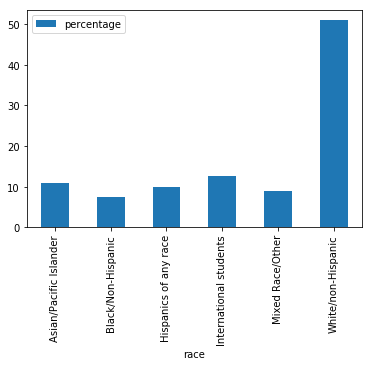

In [147]:
mean_percs.plot(kind='bar');